## 用python进行数据分析实战
学习pandas进行数据清洗与数据分析，matplotlib可视化，词云

### 导入pandas和numpy和加载数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./DataAnalyst.csv',encoding='gb2312')

In [5]:
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


encoding 用来读取csv格式的编码。这里使用了gb2312，我的是在centos搭建的jupyter,尝试utf-8会报错

#### 数据快速浏览

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


businessZones，secondType，positionLables有缺失数据，companyId和positionId 为整数类型，其他都是字符串。
浏览尾部数据

In [7]:
df.tail()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
6871,北京,北京亿盛融华投资管理有限公司,151898,NaN,亿盛资本,150-500人,NaN,市场/商务/销售类,销售,大专,金融、教育,2469682,高薪双休五险一金时间自由朝九晚五,金融证券分析师&nbsp;&nbsp;助理,"['分析师', '金融', '证券']",10K-20K,不限
6872,北京,北京亿盛融华投资管理有限公司,151898,NaN,亿盛资本,150-500人,NaN,产品/需求/项目类,项目管理,大专,金融、教育,2469686,高薪五险一金双休朝九晚五带薪年假20天,金融证券分析师&nbsp;可培训,"['项目管理', '专员', '助理', '实习生', '风控', '采购', '分析师',...",15K-30K,不限
6873,北京,北京亿盛融华投资管理有限公司,151898,NaN,亿盛资本,150-500人,NaN,其他,房地产|建筑业,大专,金融、教育,2470949,高薪五险一金双休朝九晚五无加班可培训,金融证券分析师&nbsp;讲师&nbsp;助理,"['分析师', '职业培训', '教育', '培训', '金融', '证券', '股票', ...",15K-30K,不限
6874,北京,北京亿盛融华投资管理有限公司,151898,NaN,亿盛资本,150-500人,NaN,市场/商务/销售类,销售,大专,金融、教育,2465839,高薪&nbsp;无加班&nbsp;&nbsp;双休&nbsp;&nbsp;五险一金&nbsp;,金融证券分析师助理讲师助理,"['实习生', '主管', '经理', '顾问', '销售', '客户代表', '分析师',...",10K-20K,不限
6875,北京,北京亿盛融华投资管理有限公司,151898,NaN,亿盛资本,150-500人,NaN,金融类,风控,不限,金融、教育,2471674,挑战高薪，挑战自我,1W五险双休诚聘金融分析师助理可兼职,"['分析师', '金融']",8K-15K,不限


### 数据清洗
#### 数据去重

In [3]:
df_duplicates = df.drop_duplicates(subset='positionId',keep='first')
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB


#### 计算薪资

In [13]:
df_duplicates['salary'].head(20)

0       7k-9k
1     10k-15k
2       4k-6k
3       6k-8k
4       2k-3k
5     10k-15k
6      7k-14k
7       5k-7k
8       4k-8k
9       2k-4k
10      5k-6k
11      2k-4k
12      2k-3k
13      4k-6k
14      4k-8k
15    10k-15k
16    10k-15k
17      6k-8k
18      2k-3k
19      3k-4k
Name: salary, dtype: object

薪资数据很不一致

In [4]:
def cut_word(word):
    pos = word.find('-')
    if  not pos==-1:
        numsalary = word[:pos-1]
    else:
        numsalary = word[:word.upper().find('K')]
    return numsalary 

In [5]:
df_duplicates['numSalary'] = df_duplicates.salary.apply(cut_word)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_duplicates.numSalary.astype('int')

0        7
1       10
2        4
3        6
4        2
5       10
6        7
7        5
8        4
9        2
10       5
11       2
12       2
13       4
14       4
15      10
16      10
17       6
18       2
19       3
20      10
21       3
22       6
23       4
24       4
25       2
26       4
27      10
28      10
29       6
        ..
5019    20
5020    15
5021     8
5022     6
5023     5
5024     2
5025     4
5026     6
5027     6
5028     5
5029     4
5030     3
5031    10
5032     8
5033     8
5034    10
5035     6
5036    15
5037     3
5038     4
5039     6
5040    12
5041     3
5042     3
5043     8
6054    15
6330    15
6465    30
6605     4
6766    15
Name: numSalary, Length: 5031, dtype: int64

In [ ]:
import re
def clean_salary1(word,method='bottom',top_salary=0,bottom_salary=0):
    try:
        bottom_salary = re.findall("\d+",word)[0]
        top_salary = re.findall('\d+',word)[1]
    except IndexError:
        top_salary = bottom_salary
        if method == "top":
            return top_salary
        else:
            return bottom_salary

bottomSalary转换为数字

In [7]:
def cut_word1(word, method):
    pos = word.find('-')
    length = len(word)
    if not pos==-1:
        bottomsalary = word[:pos-1]
        topsalary = word[pos+1:length-1]
    else:
        bottomsalary = word[:word.upper().find('K')]
        topsalary = bottomsalary
    if method=='bottom':
        return bottomsalary
    else:
        return topsalary 
    

In [8]:
df_duplicates['topSalary'] = df_duplicates.salary.apply(cut_word1, method='top')

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### 求平均薪资

In [9]:
df_duplicates.topSalary = df_duplicates.topSalary.astype('int')
df_duplicates.numSalary = df_duplicates.numSalary.astype('int')

df_duplicates['avgSalary'] = df_duplicates.apply(lambda x:(x.numSalary+x.topSalary)-2,axis=1)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


axis是apply中的参数，axis=1表示将函数用在行，axis=0则是列

In [10]:
df_fina = df_duplicates[['city','companyShortName','companySize',
               'education','positionName','positionLables',
               'workYear','avgSalary']]

In [32]:
df_fina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 8 columns):
city                5031 non-null object
companyShortName    5031 non-null object
companySize         5031 non-null object
education           5031 non-null object
positionName        5031 non-null object
positionLables      5007 non-null object
workYear            5031 non-null object
avgSalary           5031 non-null int64
dtypes: int64(1), object(7)
memory usage: 513.7+ KB


In [33]:
df_fina.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

value_counts是计数，统计所有非零元素的个数，以降序的方式输出Series

In [35]:
df_fina.describe()

,avgSalary
count,5031.000000
mean,32.222819
std,17.992484
min,1.000000
25%,21.000000
50%,28.000000
75%,43.000000
max,148.000000


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# 图形风格
plt.style.use('ggplot')

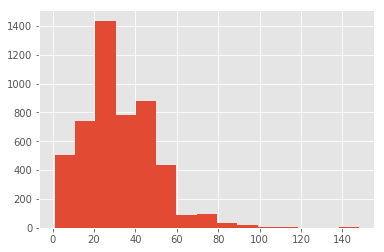

In [39]:
# 直方图，bins选择粒度大小
df_fina.avgSalary.hist(bins=15)

In [ ]:
箱线图观察不同城市、不同学历对薪资的影响

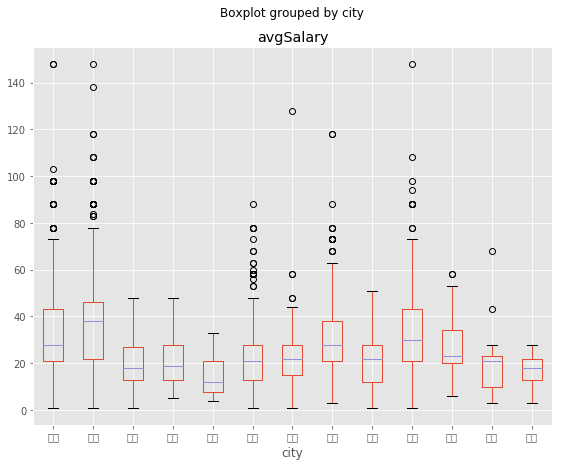

In [40]:
df_fina.boxplot(column='avgSalary',by='city',figsize=(9,7))

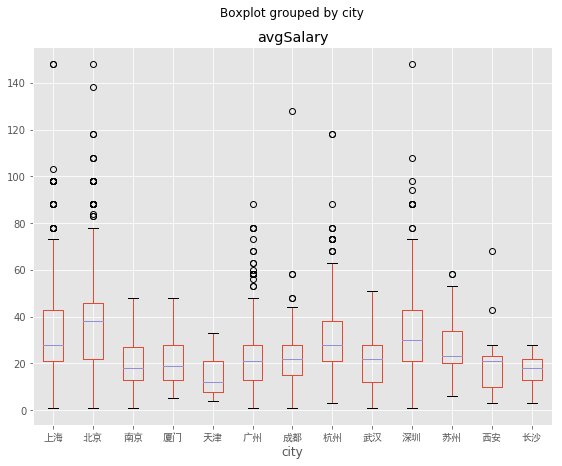

In [43]:
from matplotlib.font_manager import FontProperties
font_zh = FontProperties(fname="./simhei.ttf")
# font_zh = FontProperties(fname="Library/Fonts/Songti.ttc")

ax = df_fina.boxplot(column='avgSalary',by='city',figsize=(9,7))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

首先加载字体管理包，设置一个载入中文字体的变量，不同系统的路径不一样。boxplot是我们调用的箱线图函数，column选择箱线图的数值，by是选择分类变量，figsize是尺寸
ax.get_xticklabels获取坐标轴刻度，即城市名，利用set_fontpeoperties更改字体。

从地区看,北京的数据分析师薪资高于其他城市，上海和深圳稍次

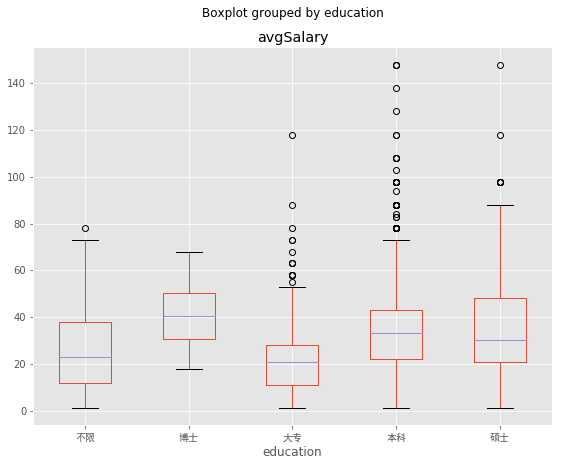

In [44]:
ax = df_fina.boxplot(column='avgSalary',by='education',figsize=(9,7))

for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

从学历看，博士薪资遥遥领先，虽然在top区域不如本科和硕士

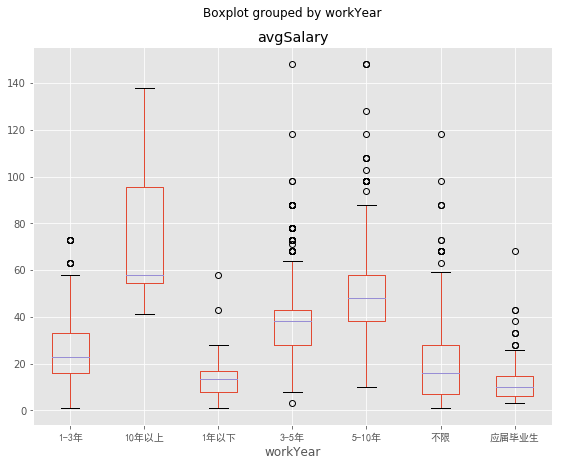

In [47]:
df_fina.sort_values('workYear')
ax = df_fina.boxplot(column='avgSalary',by='workYear',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

工作年限看，薪资的差距进一步拉大

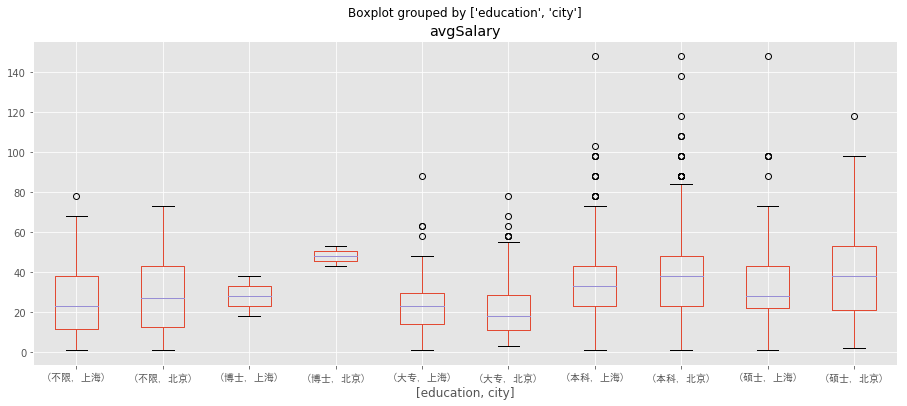

In [54]:
df_sh_bj = df_fina[df_fina['city'].isin(['上海','北京'])]
ax = df_sh_bj.boxplot(column='avgSalary',by=['education','city'],figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

北京不同学历都是稍优于上海的，而在博士幅度的相差较大大

In [60]:
df_fina.groupby('city').count()

,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
city,,,,,,,
上海,979,979,979,979,973,979,979
北京,2347,2347,2347,2347,2336,2347,2347
南京,83,83,83,83,82,83,83
厦门,30,30,30,30,30,30,30
天津,20,20,20,20,20,20,20
广州,335,335,335,335,333,335,335
成都,135,135,135,135,134,135,135
杭州,406,406,406,406,405,406,406
武汉,69,69,69,69,69,69,69


count()返回的是不同城市的各列计数结果 value_counts计算不为空得知，count(）会将空值也计数

In [56]:
df_fina.groupby(['city','education']).mean().unstack()

avgSalary                                       
education         不限    博士         大专         本科         硕士
city                                                       
上海         26.102941  28.0  24.790909  33.975104  36.360000
北京         29.346774  48.0  22.678947  36.871604  37.519481
南京         12.000000   NaN  16.545455  20.655738  25.000000
厦门         23.000000   NaN  11.571429  21.611111  29.500000
天津          5.000000   NaN   9.000000  16.600000        NaN
广州         16.500000   NaN  15.976190  26.340517  27.142857
成都         19.125000   NaN  20.000000  25.040404  23.500000
杭州         34.538462   NaN  22.655172  31.646865  39.421053
武汉         19.900000   NaN  20.428571  21.000000  12.000000
深圳         28.200000  68.0  25.797872  35.065823  34.058824
苏州               NaN   NaN  27.200000  26.620690  31.666667
西安         15.333333   NaN  14.300000  22.416667   8.000000
长沙         13.285714   NaN  16.000000  19.266667  16.000000

In [59]:
df_fina.groupby('companyShortName').avgSalary.agg(['count','mean']).sort_values(by='count',ascending=False)

,count,mean
companyShortName,,
美团点评,175,41.725714
滴滴出行,64,52.703125
百度,44,36.272727
网易,36,34.416667
今日头条,32,32.250000
腾讯,32,42.875000
京东,32,38.781250
百度外卖,31,33.548387
个推,31,27.032258


使用了agg函数，同时传入count和mean方法，回了不同公司的计数和平均值两个结果

In [68]:
def topN(dfa,n=5):
    counts = dfa.value_counts()
    return counts.sort_values(ascending=False)[:n]
df_fina.groupby('city').companyShortName.apply(topN)

city                 
上海    饿了么                 23
      美团点评                19
      买单侠                 15
      返利网                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      亚信                   3
厦门    美图公司                 4
      厦门融通信息技术有限责任公司       2
      Datartisan 数据工匠      2
      智业软件                 1
      美柚                   1
天津    神州商龙                 2
      数极客                  1
      丰赢未来                 1
      天津小猫                 1
      三汇数字天津分公司            1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      PPmoney互联网金融平台       6
                        ... 
杭州    个推                  22
      网易                  15
      有数金服           

以上招聘数据分析师需求前5的公司.agg虽然能返回计数也能排序，但它返回的是所有结果，返回的是部分结果时，可以使用apply
agg和apply是不同的，虽然某些方法相近，比如求sum，count等，但是apply支持更细的粒度，它能按组进行复杂运算，将数据拆分合并，而agg则必须固定为列

不同城市，各职位招聘数靠前的

In [69]:
df_fina.groupby('city').positionName.apply(topN)

city                
上海    数据分析师              79
      大数据开发工程师           37
      数据产品经理             31
      大数据工程师             26
      高级数据分析师            20
北京    数据分析师             238
      数据产品经理            121
      大数据开发工程师           69
      分析师                49
      数据分析               42
南京    大数据开发工程师            5
      数据分析师               5
      大数据架构师              3
      大数据工程师              3
      数据规划（财务数据类）         2
厦门    数据分析师               3
      数据分析专员              3
      大数据开发工程师            2
      数据工程师               1
      风控/数据分析师            1
天津    数据分析师               3
      数据工程师               2
      数据专员                1
      业务/数据研究岗            1
      商业数据录入员             1
广州    数据分析师              31
      需求分析师              23
      大数据开发工程师           13
      数据分析专员             10
      高级数据分析师             9
                       ... 
杭州    数据分析师              44
      大数据开发工程师           22
      数据产品经理             15
      数据仓库工程师            11

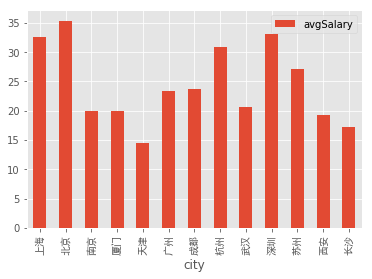

In [70]:
ax = df_fina.groupby('city').mean().plot.bar()
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

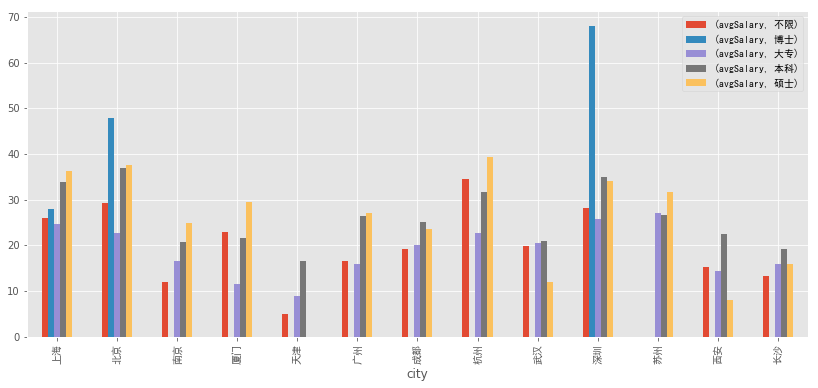

In [72]:
ax = df_fina.groupby(['city','education']).mean().unstack().plot.bar(figsize=(14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh)    

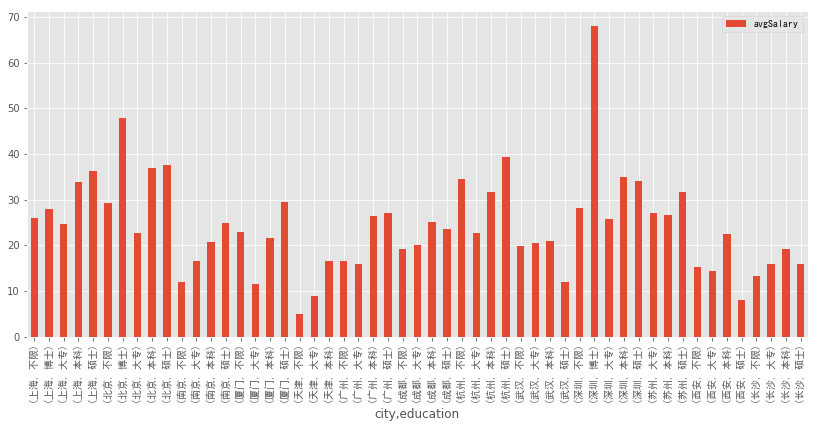

In [73]:
ax = df_fina.groupby(['city','education']).mean().plot.bar(figsize=(14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh)

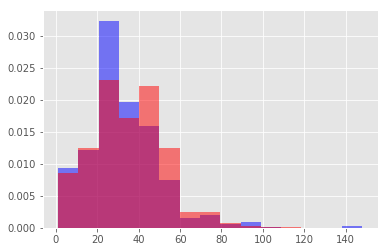

In [78]:
plt.hist(x=df_fina[df_fina.city=='上海'].avgSalary,
        bins=15,
        normed=1,
        facecolor='blue',
        alpha=0.5)
        
plt.hist(x=df_fina[df_fina.city=='北京'].avgSalary,
        bins=15,
        normed=1,
        facecolor='red',
        alpha=0.5)
plt.show()

In [ ]:
用normed参数转化为密度,对比上海和北京的薪资数据

In [ ]:
或者对数据进行深加工。我们将薪资设立出不同的level

In [85]:
bins = [0,3,5,10,15,20,30,100]
level = ['0-3','3-5','5-10','10-15','15-20','20-30','30-100']
df_fina['level']=pd.cut(df_fina['avgSalary'],bins =bins,labels=level)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


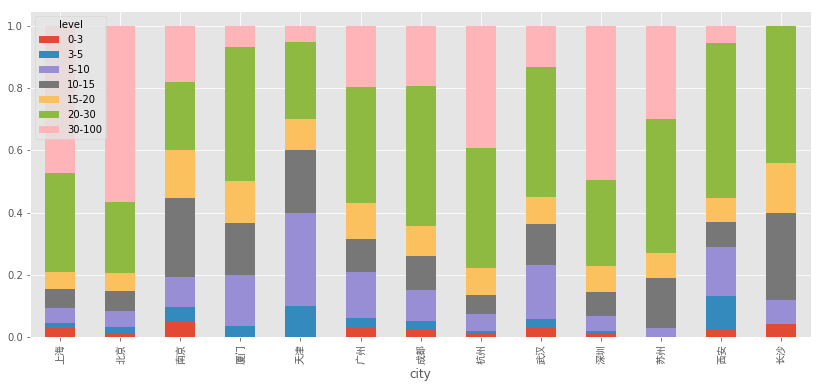

In [86]:
df_level = df_fina.groupby(['city','level']).avgSalary.count().unstack()
df_level_prop = df_level.apply(lambda x:x/x.sum(),axis=1)
ax = df_level_prop.plot.bar(stacked=True,figsize=(14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

cut的作用是分桶，它也是数据分析常用的一种方法，将不同数据划分出不同等级，也就是将数值型数据加工成分类数据，在机器学习的特征工程中应用比较多。cut可以等距划分，传入一个数字就好

In [11]:
df_fina.positionLables

0                           ['分析师', '数据分析', '数据挖掘', '数据']
1                           ['分析师', '数据分析', '数据挖掘', '数据']
2                                   ['分析师', '数据分析', '数据']
3                              ['商业', '分析师', '大数据', '数据']
4                             ['分析师', '数据分析', '数据', 'BI']
5                       ['实习', '投资', 'FA', '行业研究', '分析师']
6                                                  ['数据']
7                      ['需求分析', '顾问', '咨询', '咨询顾问', '数据']
8                                          ['后端开发', '数据']
9                                                  ['数据']
10                                    ['平台', '大数据', '数据']
11                                         ['数据分析', '数据']
12                                   ['数据分析', '数据', 'BI']
13                                                 ['数据']
14                                          ['大数据', '数据']
15                                                 ['数据']
16                                          ['大数据', '数据']
17            

df_clean.positionLables是Series，并不能直接套用replace。apply是一个好方法，但是比较麻烦,用str方法

In [13]:
df_fina.positionLables.str[1:-1]

0                             '分析师', '数据分析', '数据挖掘', '数据'
1                             '分析师', '数据分析', '数据挖掘', '数据'
2                                     '分析师', '数据分析', '数据'
3                                '商业', '分析师', '大数据', '数据'
4                               '分析师', '数据分析', '数据', 'BI'
5                         '实习', '投资', 'FA', '行业研究', '分析师'
6                                                    '数据'
7                        '需求分析', '顾问', '咨询', '咨询顾问', '数据'
8                                            '后端开发', '数据'
9                                                    '数据'
10                                      '平台', '大数据', '数据'
11                                           '数据分析', '数据'
12                                     '数据分析', '数据', 'BI'
13                                                   '数据'
14                                            '大数据', '数据'
15                                                   '数据'
16                                            '大数据', '数据'
17            

str方法允许我们针对列中的元素，进行字符串相关的处理

In [14]:
df_fina.positionLables.str[1:-1].str.replace(' ','')

0                           '分析师','数据分析','数据挖掘','数据'
1                           '分析师','数据分析','数据挖掘','数据'
2                                  '分析师','数据分析','数据'
3                              '商业','分析师','大数据','数据'
4                             '分析师','数据分析','数据','BI'
5                        '实习','投资','FA','行业研究','分析师'
6                                               '数据'
7                       '需求分析','顾问','咨询','咨询顾问','数据'
8                                        '后端开发','数据'
9                                               '数据'
10                                   '平台','大数据','数据'
11                                       '数据分析','数据'
12                                  '数据分析','数据','BI'
13                                              '数据'
14                                        '大数据','数据'
15                                              '数据'
16                                        '大数据','数据'
17                                        '分析师','内容'
18                                            

In [17]:
word = df_fina.positionLables.str[1:-1].str.replace(' ','')
word.dropna().str.split(',').apply(pd.value_counts)

,'.NET','15天年假','Android','BD','BI','B端','C','C++','C/C++','CRM',...,'音视频处理','项目管理','项目经理','顾问','风控','风险控制','餐饮','驾照','高校','高级'
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


通过apply和value_counts函数统计标签数,value_counts逐行计算列表中的标签

In [20]:
df_word = word.dropna().str.split(',').apply(pd.value_counts)
df_word.unstack()

'.NET'  0       NaN
        1       NaN
        2       NaN
        3       NaN
        4       NaN
        5       NaN
        6       NaN
        7       NaN
        8       NaN
        9       NaN
        10      NaN
        11      NaN
        12      NaN
        13      NaN
        14      NaN
        15      NaN
        16      NaN
        17      NaN
        18      NaN
        19      NaN
        20      NaN
        21      NaN
        22      NaN
        23      NaN
        24      NaN
        25      NaN
        26      NaN
        27      NaN
        28      NaN
        29      NaN
               ... 
'高级'    5019    NaN
        5020    NaN
        5021    NaN
        5022    1.0
        5023    NaN
        5024    NaN
        5025    NaN
        5026    NaN
        5027    NaN
        5028    NaN
        5029    NaN
        5030    NaN
        5031    NaN
        5032    NaN
        5033    NaN
        5034    NaN
        5035    NaN
        5036    NaN
        5037    NaN


统计所有标签在各个职位的出现次数，绝大多数肯定是NaN

In [21]:
df_word.unstack().dropna().reset_index()

,level_0,level_1,0
0,'.NET',1397,1.0
1,'.NET',2822,1.0
2,'.NET',3765,1.0
3,'.NET',3949,1.0
4,'.NET',3954,1.0
5,'.NET',4114,1.0
6,'15天年假',1726,1.0
7,'Android',1821,1.0
8,'BD',360,1.0
9,'BD',661,1.0


将空值删除,重排序索引,并且重置为DataFrame,时level_0为标签名，level_1为df_index的索引

In [33]:
df_word_counts = df_word.unstack().dropna().reset_index().groupby('level_0').count()
df_word_counts

,level_1,0
level_0,,
.NET,6,6
15天年假,1,1
Android,1,1
BD,11,11
BI,201,201
B端,1,1
C,3,3
C++,8,8
C/C++,3,3


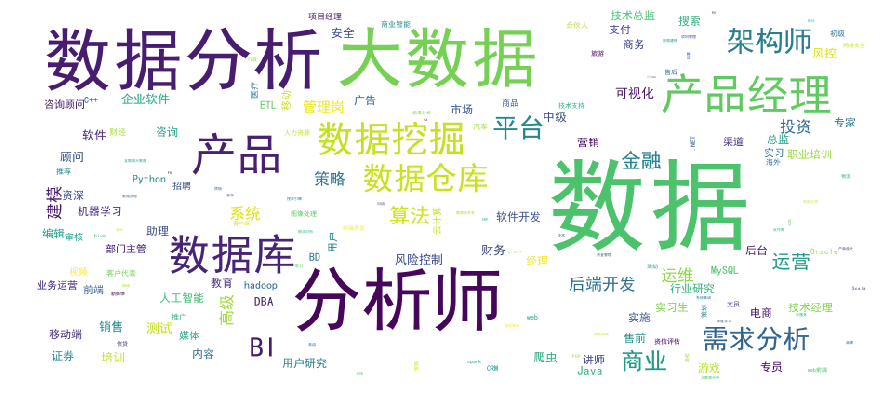

In [32]:
from wordcloud import WordCloud

df_word_counts.index = df_word_counts.index.str.replace("'","")
"/usr/my/font/simhei.ttf"
wordcloud = WordCloud(font_path="/usr/my/font/simhei.ttf",
                     width=900,height=400,
                     background_color='white'
                     )
f, axs = plt.subplots(figsize=(15,15))
wordcloud.fit_words(df_word_counts.level_1)
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()